In [3]:
import numpy as np
import pandas as pd
import re

In [4]:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
#loading 
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [6]:
#seeing duplicates
df.duplicated().sum()

122

In [7]:
df.sample()
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
3459,flat,sector 109,ATS Tourmaline3.9 ★,2.3,8897.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3+,"servant room,others",10.0,East,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


### 1 .areaWithType

In [8]:
#area column is not reliable 
df.sample(5)[['price' , 'area' , 'areaWithType']]

,price,area,areaWithType
3049,2.10,2400.0,Super Built up area 2400(222.97 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.)
1897,4.30,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 sq.ft. (13.47 sq.m.)
2200,0.86,1760.0,Super Built up area 1760(163.51 sq.m.)
3361,1.70,1999.0,Super Built up area 1999(185.71 sq.m.)
1543,0.55,741.0,Carpet area: 741 (68.84 sq.m.)


In [9]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function extracts the Built Up area or Carpet area

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [11]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value =float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value


In [12]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [13]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1882,NaN,house,NaN,Built Up area: 5000 (464.52 sq.m.),NaN,5000.0,NaN
368,0.65,flat,1350.0,Super Built up area 1350(125.42 sq.m.),1350.0,NaN,NaN
2829,2.10,flat,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),2175.0,1745.0,1725.0
2780,3.30,flat,2185.0,Super Built up area 2185(202.99 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),2185.0,1800.0,1600.0
1505,3.35,house,6000.0,Built Up area: 6000 (557.42 sq.m.),NaN,6000.0,NaN


In [14]:
# not null of these three values (super,built,carpet)
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(534, 7)

In [15]:
df.duplicated().sum()

122

In [16]:
# plot area
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,9.5,house,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450 sq.yards (6229.15 sq.m.),NaN,7450.0,NaN
10,6.1,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
12,5.0,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
17,0.9,house,900.0,Plot area 900(83.61 sq.m.)Built Up area: 3500 sq.ft. (325.16 sq.m.),NaN,3500.0,NaN
34,2.9,house,1557.0,Plot area 173(144.65 sq.m.)Built Up area: 1415 sq.yards (1183.12 sq.m.)Carpet area: 1350 sq.yards (1128.77 sq.m.),NaN,1415.0,1350.0


In [17]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1103
agePossession             1
nearbyLocations         177
furnishDetails          981
features                633
super_built_up_area    1887
built_up_area          2614
carpet_area            1858
dtype: int64

In [18]:
# all values are missing ( super,build,carpet)
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [19]:
all_nan_df.head()


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
10,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
12,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
47,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,NaN,NaN
54,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,NaN,NaN
55,0.85,house,600.0,Plot area 600(55.74 sq.m.),NaN,NaN,NaN


In [20]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [23]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [24]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [25]:
# compare area vs built up area
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3615,2.70,house,1450.0,Plot area 1450(134.71 sq.m.),NaN,1450.0,NaN
984,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.0,NaN
1666,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,359.0,NaN
2438,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
1303,3.40,house,2628.0,Plot area 292(244.15 sq.m.),NaN,292.0,NaN


In [26]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [27]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [28]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
10,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.0,NaN
12,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,2340.0,NaN
47,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,1460.0,NaN
54,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,2034.0,NaN
55,0.85,house,600.0,Plot area 600(55.74 sq.m.),NaN,600.0,NaN


In [29]:
# update the original dataframe
df.update(all_nan_df)

In [30]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1103
agePossession             1
nearbyLocations         177
furnishDetails          981
features                633
super_built_up_area    1887
built_up_area          2068
carpet_area            1858
dtype: int64

In [49]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,servant room,4.0,NaN,Under Construction,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1940.0,NaN
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,"servant room,others",11.0,East,0 to 1 Year Old,"['IRIS Broadway Mall', 'Delhi Jaipur Expressway', 'Shishu Kalyan Senior Secondary School', 'Aarvy Healthcare Hospital']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2786.0,NaN,NaN
2,flat,sector 51,Orchid Island4.2 ★,1.70,10651.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3,4,3,"pooja room,store room",2.0,West,5 to 10 Year Old,"['Rapid Metro Sector 55-56', 'Tigra Market', 'Garima Public School', 'Gurugram University', 'ISKCON Temple', 'Artemis Hospital', 'IGI Airport', 'APJ Abdul Kalam Park', 'Imperfecto Patio']","['4 Geyser', '10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1596.0
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,pooja room,3.0,North-West,1 to 5 Year Old,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1210.0,NaN,NaN
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450 sq.yards (6229.15 sq.m.),5,5,3,servant room,2.0,NaN,1 to 5 Year Old,"['Ansal Plaza', 'Dwaraka Expressway', '

### 2.additionalRoom

In [31]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1585
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [32]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [33]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1489,not available,0,0,0,0,0
3566,servant room,0,1,0,0,0
1653,pooja room,0,0,0,1,0
506,not available,0,0,0,0,0
700,not available,0,0,0,0,0


In [34]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,servant room,4.0,NaN,Under Construction,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1940.0,NaN,0,1,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,"servant room,others",11.0,East,0 to 1 Year Old,"['IRIS Broadway Mall', 'Delhi Jaipur Expressway', 'Shishu Kalyan Senior Secondary School', 'Aarvy Healthcare Hospital']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2786.0,NaN,NaN,0,1,0,0,1
2,flat,sector 51,Orchid Island4.2 ★,1.70,10651.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3,4,3,"pooja room,store room",2.0,West,5 to 10 Year Old,"['Rapid Metro Sector 55-56', 'Tigra Market', 'Garima Public School', 'Gurugram University', 'ISKCON Temple', 'Artemis Hospital', 'IGI Airport', 'APJ Abdul Kalam Park', 'Imperfecto Patio']","['4 Geyser', '10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1596.0,0,0,1,1,0
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,pooja room,3.0,North-West,1 to 5 Year Old,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1210.0,NaN,NaN,0,0,0,1,0
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450 sq.yards (6229.

### 3.agePossession

In [37]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       574
0 to 1 Year Old        530
undefined              332
10+ Year Old           309
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Oct 2023                 4
Jul 2024                 4
By 2025                  4
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Jan 2025                 3
Oct 2025                 2
Jan 2026                 2
Aug 2025                 2
Mar 2025                 2
Jul 2027                 2
Dec 2026                 2
Sep 2025                 2
Jun 2027                 2
Apr 2026      

In [38]:

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    
    try :
        #for entries like "May 2024"
        int(value.split(" ")[-1])
        return "Under Construction"

    except:
        return "Undefined"
    

In [39]:
# apply the function  
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)


In [40]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         574
Undefined              333
Old Property           309
Under Construction     283
Name: count, dtype: int64

In [41]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,servant room,4.0,NaN,Under Construction,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1940.0,NaN,0,1,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,"servant room,others",11.0,East,New Property,"['IRIS Broadway Mall', 'Delhi Jaipur Expressway', 'Shishu Kalyan Senior Secondary School', 'Aarvy Healthcare Hospital']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2786.0,NaN,NaN,0,1,0,0,1
2,flat,sector 51,Orchid Island4.2 ★,1.70,10651.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3,4,3,"pooja room,store room",2.0,West,Moderately Old,"['Rapid Metro Sector 55-56', 'Tigra Market', 'Garima Public School', 'Gurugram University', 'ISKCON Temple', 'Artemis Hospital', 'IGI Airport', 'APJ Abdul Kalam Park', 'Imperfecto Patio']","['4 Geyser', '10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1596.0,0,0,1,1,0
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,pooja room,3.0,North-West,Relatively New,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1210.0,NaN,NaN,0,0,0,1,0
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450 sq.yards (6229.15 sq.

### 4.furnishDetails


In [42]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
448,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1786,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1361,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2766,"['6 Fan', '10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3767,[],"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Rain Water Harvesting']"


In [47]:
# Extract all unique furnishings from the furnishDetails column
all_furnishing = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[' ,'').replace(']' ,'').replace("'" , "").split(',')
    all_furnishing.extend(furnishings)

unique_furnishings = list(set(all_furnishing))

In [48]:
## Define a function to extract the count of a furnishing from the furnishDetails

def get_furnishing_count(details ,furnishing):
    if isinstance(details ,str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [49]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [50]:
furnishings_df.shape

(3801, 19)

In [51]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_6920\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [52]:
furnishings_df.sample(5)

,AC,TV,Water Purifier,Curtains,Microwave,Fridge,Sofa,Dining Table,Bed,Fan,Wardrobe,Geyser,Stove,Exhaust Fan,Chimney,Light,Modular Kitchen,Washing Machine
149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3038,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2755,0,0,0,0,0,0,0,0,0,7,3,3,0,1,0,7,0,0


In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [57]:
wcss_reduced  = []  # within-cluster sum of square

for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i , init ='k-means++' , random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

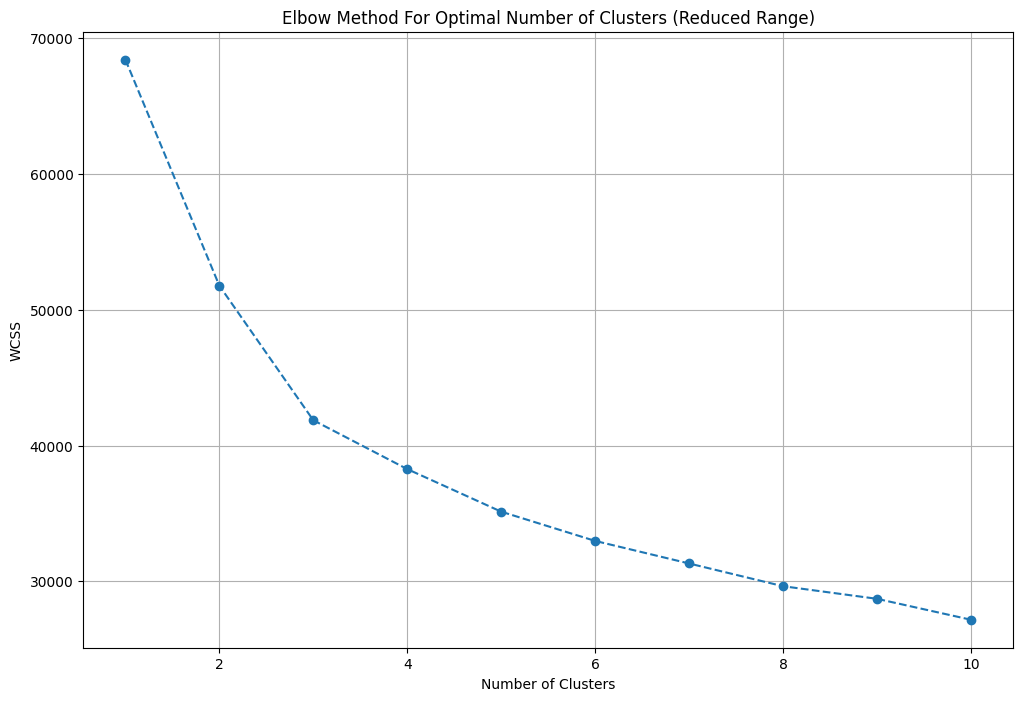

In [58]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [59]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
df = df.iloc[:,:-18]

In [61]:
df['furnishing_type'] = cluster_assignments

In [95]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
558,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2700,"['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3461,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '7 Light', '1 Modular Kitchen', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2465,"['4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
902,"['9 Wardrobe', '15 Fan', '1 Exhaust Fan', '9 Geyser', '3 Microwave', '1 Stove', '45 Light', '12 AC', '3 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


### 5.features

In [63]:
df[['society','features']].sample(5)

,society,features
1115,The Penthouses at the Hibiscus,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
625,HSIIDC Sidco Aravali,"['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Security Personnel']"
1833,Smart World Gems,NaN
1406,sare crescent parc royal greens phase 1,NaN
776,KW Royal Court,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [64]:
df['features'].isnull().sum()

633

In [68]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [69]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [96]:
temp_df = df[df['features'].isnull()]

In [71]:
temp_df.shape

(633, 26)

In [91]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [92]:
df.loc[temp_df.index,'features'] = x.values

In [93]:
# we fill some of the missing values
df['features'].isnull().sum()

616

In [79]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [88]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [89]:
features_binary_df.sample(5)

,24/7 Power Backup,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Creche/Day care,Cricket Pitch,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Landscape Garden,Laundry,Lawn Tennis Court,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Natural Light,No open drainage around,Park,Pergola,Piped Gas,Piped-gas,Power Back-up,Private Garden / Terrace,Property Staff,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Terrace Garden,Video Door Security,Visitor Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2166,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
features_binary_df.shape

(3801, 96)

In [98]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Real Estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

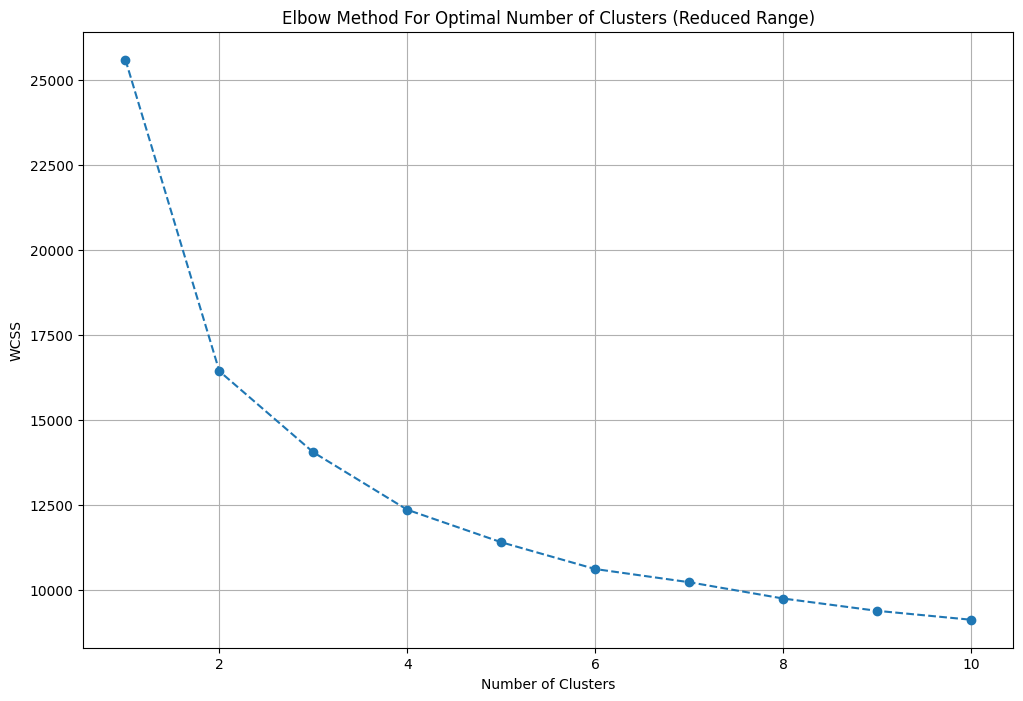

In [99]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [101]:

# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Natural Light': 8,
    'Park': 8,
    'Piped Gas': 7,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [102]:
df['luxury_score'] = luxury_score

In [103]:
df.head()


,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,servant room,4.0,NaN,Under Construction,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1940.0,NaN,0,1,0,0,0,0,[],0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,"servant room,others",11.0,East,New Property,"['IRIS Broadway Mall', 'Delhi Jaipur Expressway', 'Shishu Kalyan Senior Secondary School', 'Aarvy Healthcare Hospital']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2786.0,NaN,NaN,0,1,0,0,1,0,"[Security / Fire Alarm, Lift(s), Maintenance Staff, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",86
2,flat,sector 51,Orchid Island4.2 ★,1.70,10651.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3,4,3,"pooja room,store room",2.0,West,Moderately Old,"['Rapid Metro Sector 55-56', 'Tigra Market', 'Garima Public School', 'Gurugram University', 'ISKCON Temple', 'Artemis Hospital', 'IGI Airport', 'APJ Abdul Kalam Park', 'Imperfecto Patio']","['4 Geyser', '10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1596.0,0,0,1,1,0,0,"[Power Back-up, Private Garden / Terrace, Intercom Facility, Maintenance Staff, Water Storage, Recently Renovated, Bank Attached Property, Visitor Parking, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Low Density Society, Rain Water Harvesting, Club house / Community Center]",90
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,pooja room,3.0,North-West,Relatively New,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance St

In [104]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [105]:
df.sample(5)

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2914,house,sector 2,ansals palam vihar,5.7,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550 sq.yards (3804.38 sq.m.)Carpet area: 4450 sq.yards (3720.77 sq.m.),5,5,2,2.0,North-East,Old Property,NaN,4550.0,4450.000000,0,0,0,1,0,2,94
3304,flat,sector 92,Sare Crescent Parc3.5 ★,1.0,5128.0,1950.0,Carpet area: 1950 (181.16 sq.m.),4,3,2,1.0,East,Relatively New,NaN,NaN,1950.000000,0,0,0,0,0,0,49
971,flat,sector 63,Adani Brahma Samsara Vilasa,3.0,16666.0,1800.0,Carpet area: 1800 (167.23 sq.m.),3,3,3,3.0,East,New Property,NaN,NaN,1800.000000,0,0,0,0,0,0,24
2732,flat,sohna road,Breez Global Hill View,0.3,5124.0,585.0,Carpet area: 585.41 (54.39 sq.m.),2,2,1,11.0,North,New Property,NaN,NaN,585.448521,0,0,0,0,0,0,91
2083,house,sector 57,ansals florence villa,3.3,19820.0,1665.0,Plot area 185(154.68 sq.m.),4,3,3+,2.0,East,Moderately Old,NaN,1665.0,NaN,1,1,1,1,0,0,151


In [106]:
df.shape

(3801, 23)

In [107]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)